<a href="https://colab.research.google.com/github/RLR-GitHub/MultilayerPerceptron/blob/master/trials/OLD_MLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from random import random, seed, uniform

# VARIABLES

In [0]:
#==================================================================
epoch = 0 
color = 0 
count = 0 
step = 0

E = 0.0 # Sumsquared error 
LEARNING_RATE = 50.0        # learning rate (rho )

MTEST = 900     # 20 x 20 -- Number of test set inputs
EPOCHS = 2000    # Complete training set pass-throughs

N = 2           # Number of inputs -- x point, y point
J = 7           # Number of hidden neurons
M = 400         # 10 x 10 -- Number of training patterns (input/output pairs) - Number of red and blue dots within image that is visable to network -- needs to be less than size of image
K = 1           # Number of output neurons 
#==================================================================
# TRAINING
X_train = np.zeros( shape = ( M, N ) )    # 100 x 2 -- shape = ( r, c ) Training set inputs 
Y_train = np.zeros( shape = ( M, K ) )    # 100 x 1 -- shape = ( r, c ) Training set output vector 
D_train = np.zeros( shape = ( M, K ) )    # 100 x 1 -- shape = ( r, c ) Training set target vector

# TESTING
X_test = np.zeros( shape = ( MTEST, N ) ) # 400 x 2 -- shape = ( r, c ) Test set inputs 
Y_test = np.zeros( shape = ( MTEST, K ) ) # 400 x 1 -- shape = ( r, c ) Test set output vector 
D_test = np.zeros( shape = ( MTEST, K ) ) # 400 x 1 -- shape = ( r, c ) Test set target vector
#==================================================================
x = np.zeros( shape = ( N ) ) # 2 -- A single input vector from training set 
y = np.zeros( shape = ( K ) ) # 1 -- Single vector of outupt neurons 
d = np.zeros( shape = ( K ) ) # 1 -- A single target vector from training set 
z = np.zeros( shape = ( J ) ) # 8 -- Vector of hidden layer neurons 
#==================================================================
# WEIGHTS
delta = np.zeros( shape = ( K ) ) 

V = np.zeros( shape = ( J, N ) ) # 8 x 2 -- Weight matrix for hidden layer 1
W = np.zeros( shape = ( K, J ) ) # 1 x 8 -- Weight matrix for hidden layer 2

delta_V = np.zeros( shape = ( J, N ) ) # 8 x 2 -- Weight changes for hidden layer 1
delta_W = np.zeros( shape = ( K, J ) ) # 1 x 8 -- Weight changes for hidden layer 2

net_hidden = np.zeros( shape = ( J ) ) # 8 -- Weighted sum of hidden layer ( Z )
net_output = np.zeros( shape = ( K ) ) # 1 -- Weiughted sum of output layer ( Y )
#==================================================================

# FUNCTIONS

In [0]:
# ACTIVATION FUNCTION

def getNormSquared( u, v ):
    squared_sum = 0.0

    for i in range( K ): 
        squared_sum = squared_sum + ( u[ i ] - v[ i ] ) * ( u[ i ] - v[ i ] )
    return( squared_sum )

def setupRandomMatrix( matrix, min_val, max_val ):
    r, c = matrix.shape
    seed(1) # Seed random number generator 
    for i in range( r ):
        for j in range( c ): 
            matrix[ i ][ j ] = max_val * random() + min_val # Generates random number [0, 1)
    return( matrix )

def getRow( matrix, row_num ):
    r, c = matrix.shape
    arr = np.zeros( shape = ( c ) )

    arr = matrix[ row_num ][:] 
    return( arr )

def matrixVectorProduct( matrix, vector ):
    r, c = matrix.shape
    sum_vector = np.zeros( shape = ( r ) )
    for i in range( r ):
        summation = 0.0
        for j in range( c ): 
            summation = summation + vector[ j ] * matrix[ i ][ j ] 
        
        sum_vector[ i ] = summation
    return( sum_vector )

def sigmoid_vector( net ):
    n = net.size
    sig_vec = np.zeros( shape = ( n ) )

    for i in range( n ):
        sig_vec[ i ] = 1.0 / ( 1 + math.exp( -1 * net[ i ] ) )
    
    return( sig_vec )

def getDelta( d, y ):
    vec_size = d.size
    delta = np.zeros( shape = ( vec_size ) )

    for i in range( K ):
        delta[ i ] = ( d[ i ] - y[ i ] ) * y[ i ] * ( 1 - y[ i ] )

    return( delta )

def weightChanges_W( delta, z, lr = LEARNING_RATE ):
    delta_W = np.zeros( shape = ( K, J ) )

    for k in range( K ):
        for j in range( J ): 
            delta_W[ k ][ j ] = lr * delta[ k ] * z[ j ]

    return( delta_W )

def weightChanges_V( W, delta, z, x, lr = LEARNING_RATE ):
    delta_V = np.zeros( shape = ( J, N ) )

    for j in range( J ):
        summation = 0.0
        for k in range( K ): 
            summation = summation + delta[ k ] * W[ k ][ j ]
        for i in range( N ):
            delta_V[ j ][ i ] = lr * z[ j ] * ( 1 - z[ j ] ) * x[ i ] * summation
    return( delta_V )

def updateWeights( delta_W, W ):
    r, c = delta_W.shape
    
    for i in range( r ):
        for j in range( c ): 
            W[ i ][ j ] = delta_W[ i ][ j ] + W[ i ][ j ]

    return( W )
    
def getTrainingSetInputs( inputs ): ### MAY BE WRONG
    r, c = inputs.shape
    seed(1) # Seed random number generator 
    for i in range( r ):
        for j in range( c ): 
            inputs[ i ][ j ] = uniform( -1.0 , 1.0 )#2 * random() - 1# Generates random number [0, 1)
    return( inputs )

def getTrainingTargetOutputs( targets, inputs, area ):
    size = inputs.size 
    #side_length = int( math.sqrt( size ) )

    summation = 0.0
    #area = 2.0
    radius = math.sqrt( area / math.pi )
    r, c = inputs.shape
    #targets = np.zeros( shape = ( r, c ) )

    for i in range( r ):
        sqrt_sum = math.sqrt( ( inputs[ i ][ 0 ] * inputs[ i ][ 0 ] ) + ( inputs[ i ][ 1 ] * inputs[ i ][ 1 ] ) )
        if( sqrt_sum <= radius ): targets[ i ][ 0 ] = True
        else: targets[ i ][ 0 ] = False
    return( targets )


def getTestingSetInputs( inputs ):
    r, c = inputs.shape
    size = inputs.size
    numSides = math.sqrt( r )
    step = 2 / ( numSides - 1 )
    inc = 0.0
    for i in range( r ):
        if( i % numSides == 0 and i != 0 ): inc = inc + 1
        inputs[ i ][ 1 ] = 1.0 - step * inc               # values from 1 to -1
        inputs[ i ][ 0 ] = -1.0 + step * ( i % numSides ) # values from -1 to 1

    return( inputs )

def getTestingTargetOutputs( targets, inputs, area ):
    #size = inputs.size 
    #side_length = int( math.sqrt( size ) )

    summation = 0.0
    #area = 2.0
    radius = math.sqrt( area / math.pi )
    r, c = targets.shape
    targets = np.zeros( shape = ( r, c ) )

    for i in range( r ):
        for j in range( c ): 
            summation = math.sqrt( ( inputs[ i ][ 0 ] * inputs[ i ][ 0 ] ) + ( inputs[ i ][ 1 ] * inputs[ i ][ 1 ] ) )
            if( summation <= radius ): targets[ i ][ j ] = True
            else: targets[ i ][ j ] = False

    return( targets )

def printSquarePLT( matrix, string, cmap = plt.cm.Blues ):

    size = matrix.size 
    side_length = int( math.sqrt( size ) )
    new_mat = np.reshape( matrix, newshape = (side_length,side_length ) )

    fig, ax = plt.subplots( figsize = ( 5,5 ) )
    ax.matshow( new_mat, cmap = cmap ) #Blues
    ax.set_ylim( -1, side_length )
    ax.set_xlim( -1, side_length )
    ax.set_title( string, va = 'bottom' )

    for r in range( side_length ):
        for c in range( side_length ):
            val = int( round( new_mat[ r ][ c ] ) )
            ax.text( r, c, str( val ), va = 'center', ha = 'center' )

# TRAINING PHASE

In [0]:
# GET TRAINING PATTERN VALUES 
X_train = getTrainingSetInputs( X_train ) # random points in [-1,1]x[-1,1]
D_train = getTrainingTargetOutputs( D_train, X_train, area = 1.0 )

# INITIALIZE WEIGHT MATRICIES 
V = setupRandomMatrix( V, -30.0, 30.0)
W = setupRandomMatrix( W, -30.0, 30.0)

count = 0
new_lr = LEARNING_RATE
old_best_err_val = 10000000

for epoch in range( EPOCHS ):

    E = 0.0; # Sumsquared error 
    for m in range( M ): 

        # FORWARD PASS
        
        x = getRow( X_train, m );                       # Get mth row of X
        d = getRow( D_train, m );                       # Get mth row of D 

        net_hidden = matrixVectorProduct( V, x );       # Get weighted sums of hidden layer 
        z = sigmoid_vector( net_hidden );               # Get weighted outputs of hidden layer 

        net_output = matrixVectorProduct( W, z );       # Get weighted sums of output layer 
        y = sigmoid_vector( net_output );               # Get weighted outputs of output layer 

        #for k in range( K ): Y_train[ m ][ k ] = y[ k ];
        #Y_train[ m ][ 0 ] = y[ 0 ];
        Y_train[ m ] = y;

        # BACKWARD PASS

        delta = getDelta( d, y );                       # Get delta values 

        delta_W = weightChanges_W( delta, z, new_lr );          # Compute weight changes of W 
        W = updateWeights( delta_W, W );                # Compute weight update of W 
        
        delta_V = weightChanges_V( W, delta, z, x, new_lr );    # Compute weight changes of V
        V = updateWeights( delta_V, V );                # Compute weight update of V
        
        E = E + 0.5 * getNormSquared( d, y );           # Increment the sumsquared error 

    print("Epoch: {0:4d}".format( epoch ), "Error: {0:5f}".format( E ), "LR:", new_lr)
    if( int( E ) <= int( old_best_err_val ) ): 
        old_best_err_val = E 
        count = 0
    else: 
        count = count + 1
        if( count >= 5 ): 
            new_lr = new_lr * 0.75
            print( "LEARNING RATE CHANGE")

# TESTING PHASE

In [0]:
# GET TESTING PATTERN VALUES 
X_test = getTestingSetInputs( X_test )
D_test = getTestingTargetOutputs( D_test, X_test, area = 2.0 )

E = 0.0
for m in range( MTEST ): 

    # FORWARD PASS 

    x = getRow( X_test, m );                        # Get mth row of X_test
    d = getRow( D_test, m );                        # Get mth row of D_test 
 
    net_hidden = matrixVectorProduct( V, x );       # Get weighted sums of hidden layer 
    z = sigmoid_vector( net_hidden );               # Get weighted outputs of hidden layer 
 
    net_output = matrixVectorProduct( W, z );       # Get weighted sums of output layer 
    y = sigmoid_vector( net_output );               # Get weighted outputs of output layer 

    #Compute Error over test set 
    E = E + 0.5 * getNormSquared( d, y );
 
    # Save output 2 print later 
    for k in range( K ): Y_test[ m ][ k ] = y[ k ];




E_TestSet: 

 155.785516806398


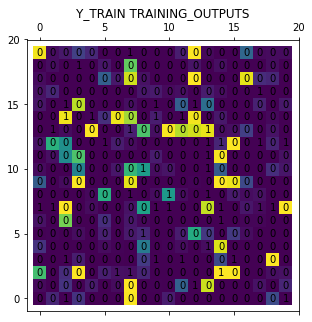

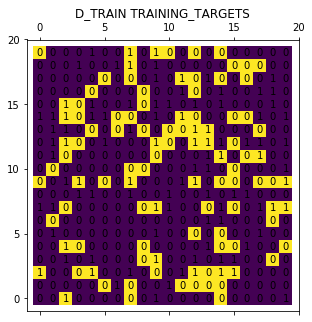

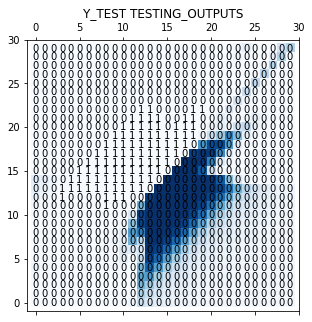

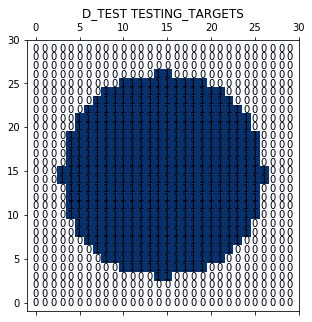

In [0]:
print("\n\nE_TestSet: \n\n", E)

printSquarePLT( Y_train, "Y_TRAIN TRAINING_OUTPUTS", None )
printSquarePLT( D_train, "D_TRAIN TRAINING_TARGETS", None ) # 'binary'

printSquarePLT( Y_test, "Y_TEST TESTING_OUTPUTS" )
printSquarePLT( D_test, "D_TEST TESTING_TARGETS" )

# PLOT DATA

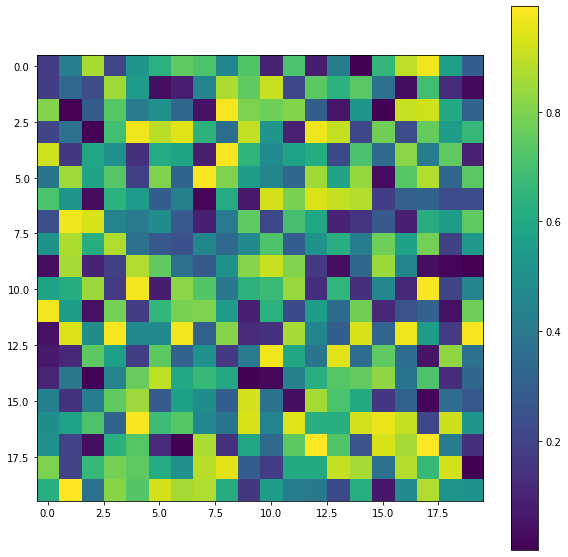

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

plt.imshow(np.random.random((20,20)));
plt.colorbar()
plt.show()



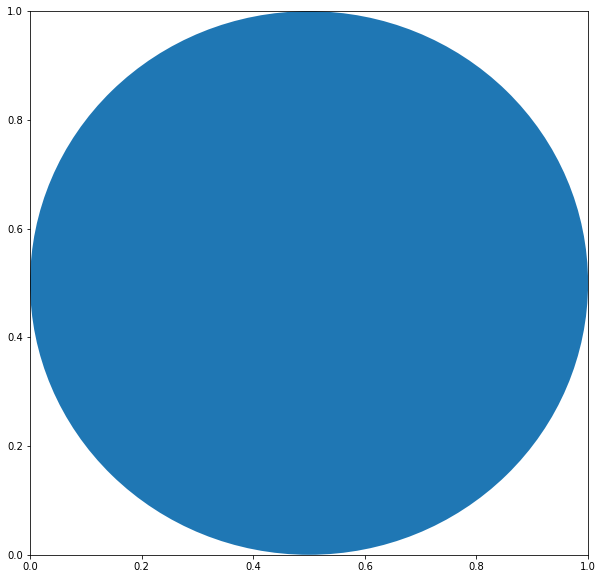

In [0]:
fig = plt.figure( figsize = (10,10), facecolor='white')#, dpi = 50)
circle = plt.Circle((0.5,0.5),0.5,fill=True)#False)
plt.gcf().gca().add_artist(circle)
plt.show()

In [0]:
rand_arr = np.random.randint(2,size=16*16)
rand_arr = np.reshape( rand_arr, ( 16, 16 ) )
print( rand_arr )

[[1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0]
 [0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1]
 [0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1]
 [1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1]
 [0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1]
 [0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1]
 [0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1]
 [1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0]
 [0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]
 [0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1]
 [1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1]
 [1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1]
 [0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
 [1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1]]
